In [39]:
import pandas as pd
import numpy as np
import random
import math
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import plotly.express as px


# read text file into pandas DataFrame

#data=pd.read_csv("concentric_circles_data", sep=',', header=None, names=["X", "Y" , "priorclass"])
# data=pd.read_csv("horshue_data.txt", sep=',', header=None, names=["X", "Y" , "priorclass"])
#data=pd.read_csv("Forty_class.txt", sep=',', header=None, names=["X", "Y" , "priorclass"])
data=make_rings()
# data=pd.DataFrame(make_rings(),columns=['X','Y'])
X = np.array(data[:,0:2])     #Predictor 
# y = np.array(data[:,2])       #Response Values
y=np.array([0]*100+[1]*200)
k = 2
sigma = 4.45
print(X.shape)
print(y.shape)



(300, 2)
(300,)


In Kernel k_means a non-linear function maps the data points to the feature space, where the distance is being calculated and the membership function is being updated.

In [2]:
def make_blobs(C=[[1,2],[5,6],[10,4]],S=[[[1,0],[0,2]],[[3,0],[0,4]],[[3,0],[0,1]]],N=[60,80,100]):
    X=np.empty([0,2])
    for i in range(len(N)):
        x=np.random.multivariate_normal(C[i],S[i],N[i])
        X=np.append(X,x,axis=0)
    return X
    
def make_rings(C=[[0]*2]*2,R=[10,20],N=[100,200],noise=2):
    X=np.empty([0,2])
    for i in range(len(N)):
        theta=np.linspace(0,2*np.pi,num=N[i])
        x=[C[i]]*N[i]+R[i]*np.stack((np.cos(theta),np.sin(theta)),axis=1)+np.random.multivariate_normal([0]*2,np.diag([noise]*2),N[i])
        X=np.append(X,x,axis=0)
    return X

def make_moons(C=[[0]*2,[20,0]],R=[20,20],N=[200,200],A=[[-0.1,np.pi*1.1],[np.pi*0.9,2.1*np.pi]],noise=2):
    X=np.empty([0,2])
    for i in range(len(N)):
        theta=np.linspace(A[i][0],A[i][1],num=N[i])
        x=[C[i]]*N[i]+R[i]*np.stack((np.cos(theta),np.sin(theta)),axis=1)+np.random.multivariate_normal([0]*2,np.diag([noise]*2),N[i])
        X=np.append(X,x,axis=0)
    return X

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1
 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1
 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0
 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 1 

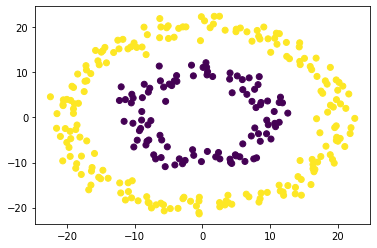

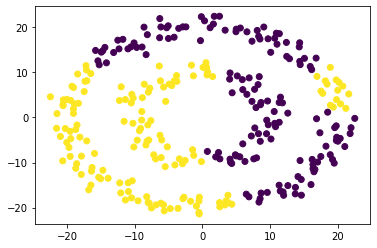

Adjusted Random Index is 0.0006241799252305999


(2, 300)

In [40]:
from sklearn.metrics.cluster import adjusted_rand_score as ARI
# array of size X taking values in the range 0 to k
initial_mem = np.random.randint(0,k,len(X)) 
initial_mem
#
initial_centers = np.zeros((k,X.shape[1]))
centers = np.zeros((k,X.shape[1]))
for j in range(k):
  initial_centers[j] = X[initial_mem==j,:].mean(axis=0)
# initial_centers

error = 100

member = np.array(initial_mem)
print(member)


'''
ker_ii = np.exp((-1) * cdist(X, X, metric='sqeuclidean')/(2 * sigma))

ker_ih = np.exp((-1) * cdist(X, centers, metric='sqeuclidean')/(2 * sigma))

#ker_ii = np.exp((-1) * cdist(X, X, metric='sqeuclidean')/(2 * sigma),)

for i in range(len(X)):
  for j in range(len(X)):
    if member[i] == member[j]:
      ker_ij = cdist(X[i], , metric='sqeuclidean')


ker_rs = 
'''


kernel = np.zeros((len(X),len(X)))
#array indicating x_i belonging to jth class
gamma = np.zeros((k,len(X)))
dist = np.zeros((k,len(X)))


#kernel = np.exp((-1) * cdist(X, X, metric='sqeuclidean')/(2 * sigma))
kernel = np.exp((-1) * pow(cdist(X, X, metric='euclidean'),2)/(2 * pow(sigma,2)))
#kernel = cdist(X, X, metric='euclidean')
ct=0

centers = np.array(initial_centers)



while( error > 1e-17):
# for _ in range(500):

  prev_centers = np.array(centers)
  #k*n membership matrix is created,k--number of clusters and n--number of elements to be clustered
  gamma = np.zeros((k,len(X)))
  
  for i in range(len(X)):
    gamma[member[i]][i] = 1

  prev_dist = np.array(dist)
  

  #Fot the third term
  cluster = np.zeros(k)
  for i in range(k):
    sum = 0
    for j in range(len(X)):
      for l in range(len(X)):
        if gamma[i][j] == 1 and gamma[i][l] == 1:
           sum = sum + kernel[j][l]

    cluster[i] = sum




  #distance of x_i from the centroid of the jth cluster
  for i in range(len(X)):
    for j in range(k):
      c_j = len(gamma[j][gamma[j] == 1])
      #print(c_j,"cluster j")
      if c_j != 0:
        dist[j][i] = kernel[i][i] - 2*kernel[i][np.where(gamma[j] == 1)].sum()/c_j + cluster[j]/(c_j*c_j)

  #membership is calculated based on the distance matrix
  member = dist.argmin(axis=0)
  
  
  
  #for i in range(len(X)):
  #  gamma[member[i]][i] = 1

  print(member,"---------")


  #error = np.linalg.norm(dist-prev_dist)
  ct+=1

  for j in range(k):
    print(centers)
    if len(X[member==j,:]) !=0 :
      centers[j] = X[member==j,:].mean(axis=0)

  error = np.linalg.norm(prev_centers-centers)
  

  # plt.scatter(X[:,0], X[:,1], marker='x')
  # plt.scatter(initial_centers[:,0], initial_centers[:,1], marker='o')
  # plt.show()
  # plt.scatter(X[:,0], X[:,1], marker='x')
  # plt.scatter(centers[:,0], centers[:,1], marker='o')
  # plt.show()

  

plt.scatter(data[:,0],data[:,1],c=y)
plt.show()
plt.scatter(data[:,0],data[:,1],c=member)
plt.show()
kernel[0][np.where(gamma[0] == 1)].sum()
print(f"Adjusted Random Index is {ARI(y,member)}")
#len(gamma[0][gamma[0] == 1])
#gamma[0][gamma[0] == 1]
#ker_ii - ker_ih
#kernel.shape
dist.shape
#gamma = dist.argmin(axis=0)


In [12]:
'''
from scipy.spatial.distance import cdist

centers = X[indices]
initial_centers = np.array(centers)
centers
error = 10
iteration = 0
while(error > 1e-6):
   
  #Finding the pairwise distance between the data instance and cluster centroids
  dist = cdist(X, centers, metric='sqeuclidean')
  print(dist)
  mem = dist.argmin(axis=1)
  #print(mem)
 

  #Update cluster centroids
  prev_centers = np.array(centers)
  for j in range(k):
    centers[j] = X[mem==j,:].mean(axis=0)
  #print(prev_centers)
  #print(centers)
  error = np.linalg.norm(centers-prev_centers)

  iteration += 1

'''


[[0.160025 0.194825]
 [0.17042  0.221978]
 [0.165653 0.203645]
 ...
 [0.116266 0.38404 ]
 [0.125773 0.399709]
 [0.099205 0.351217]]
[[0.13542981 0.07995657]
 [0.13896548 0.0994929 ]
 [0.13912016 0.08552063]
 ...
 [0.05679725 0.33629115]
 [0.06343564 0.34816867]
 [0.04494467 0.30707613]]
[[0.18327291 0.05566177]
 [0.18655142 0.07200845]
 [0.18737867 0.06035734]
 ...
 [0.05655738 0.29266215]
 [0.0633561  0.30322359]
 [0.04586148 0.26593318]]
[[0.20169277 0.05138575]
 [0.20470518 0.06689818]
 [0.20589674 0.0559405 ]
 ...
 [0.05700762 0.27505488]
 [0.06379023 0.2853195 ]
 [0.04685532 0.24914619]]
[[0.21061579 0.05044527]
 [0.21337686 0.06565687]
 [0.21483186 0.05497518]
 ...
 [0.05668869 0.26682041]
 [0.06341179 0.27699223]
 [0.04689093 0.24125864]]
[[0.21457244 0.05002236]
 [0.21724151 0.06509735]
 [0.21879841 0.05453876]
 ...
 [0.0567376  0.26329998]
 [0.06344192 0.27342843]
 [0.0470804  0.23789134]]
[[0.21604041 0.04983656]
 [0.21868449 0.06485705]
 [0.22027239 0.05434631]
 ...
 [0.0568